
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [4]:

import numpy as np
import matplotlib.pyplot as plt


In [1]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        # Avoid division by zero
        self.std[self.std == 0] = 1

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [2]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.w) + self.b

            # Errors
            error = y_pred - y

            # Gradients (L2 only on weights)
            dw = (2/n_samples) * np.dot(X.T, error) + 2 * self.l2_lambda * self.w
            db = (2/n_samples) * np.sum(error)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Loss
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.w) + self.b



In [5]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2

# Standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegressionManual(lr=0.05, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)


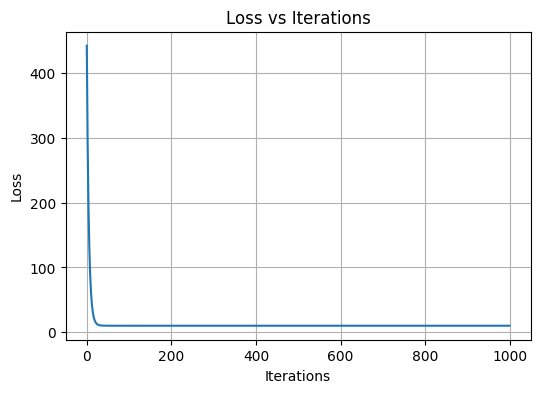

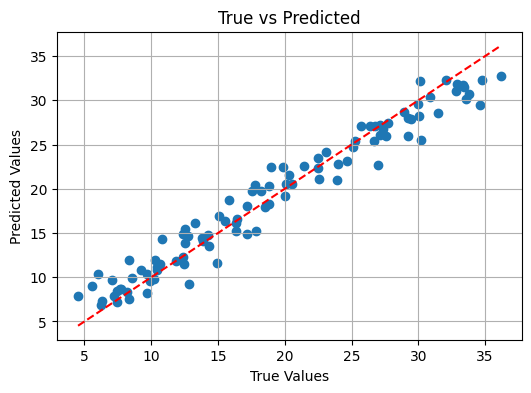

In [6]:
plt.figure(figsize=(6,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.grid()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [7]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [8]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape

        # Initialize parameters
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            # Linear combination
            z = np.dot(X, self.w) + self.b

            # Sigmoid activation
            y_hat = sigmoid(z)

            # Binary Cross Entropy Loss + L2
            eps = 1e-9  # to avoid log(0)
            loss = -np.mean(
                y * np.log(y_hat + eps) +
                (1 - y) * np.log(1 - y_hat + eps)
            )
            loss += (self.l2_lambda / (2 * m)) * np.sum(self.w ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (1 / m) * np.dot(X.T, (y_hat - y)) \
                 + (self.l2_lambda / m) * self.w
            db = (1 / m) * np.sum(y_hat - y)

            # Gradient Descent Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)



In [11]:
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)
model.fit(X_scaled, y)


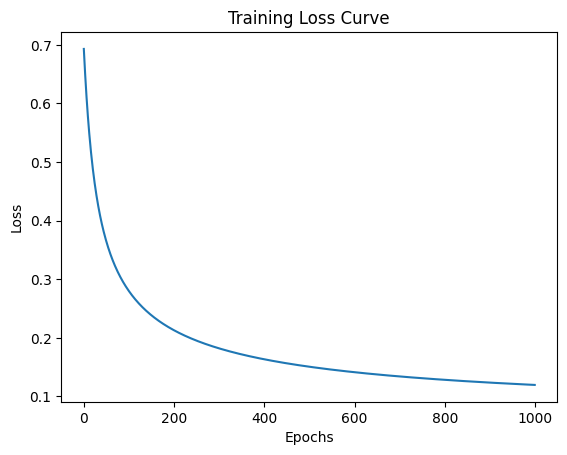

Final Accuracy: 0.995


In [12]:
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print("Final Accuracy:", accuracy)



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [13]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n, m = M.shape

    # Flatten matrix but keep positions
    values = M.flatten()
    positions = [(i, j) for i in range(n) for j in range(m)]

    N = len(values)

    # Initialize centroids randomly from values
    rng = np.random.default_rng()
    centroids = rng.choice(values, size=k, replace=False)

    # To store cluster assignment for each value
    labels = np.zeros(N, dtype=int)

    # K-Means Iterations
    for _ in range(max_iters):

        for idx in range(N):
            distances = np.abs(values[idx] - centroids)
            labels[idx] = np.argmin(distances)

        new_centroids = np.copy(centroids)

        for c in range(k):
            cluster_points = values[labels == c]
            if len(cluster_points) > 0:
                new_centroids[c] = np.mean(cluster_points)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Build assignment_table
    assignment_table = np.zeros_like(M, dtype=int)

    for idx, (i, j) in enumerate(positions):
        assignment_table[i, j] = labels[idx]

    # Build cookbook
    cookbook = {c: [] for c in range(k)}

    for idx, (i, j) in enumerate(positions):
        cookbook[labels[idx]].append((i, j))

    return assignment_table, cookbook, centroids


In [14]:
np.random.seed(0)
M = np.random.rand(4, 5)

assignment_table, cookbook, centroids = kmeans_matrix(M, k=3)

print("Centroids:", centroids)
print("\nAssignment Table:\n", assignment_table)
print("\nCookbook:")
for k, v in cookbook.items():
    print(k, ":", v)


Centroids: [0.84609194 0.52044191 0.05946125]

Assignment Table:
 [[1 0 1 1 1]
 [1 1 0 0 1]
 [0 1 1 0 2]
 [2 2 0 0 0]]

Cookbook:
0 : [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4)]
1 : [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2)]
2 : [(2, 4), (3, 0), (3, 1)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
